In [315]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['1429_1.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv']


# Sentiment Analysis: 
*Map the keywords in the review text against the review ratings to help train sentiment models.*

## Data Preparation

In [316]:
# Read Data
df = pd.read_csv(r'../input/1429_1.csv')
df.head()

C:\Users\smsal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE93E8B9E8>]],
      dtype=object)

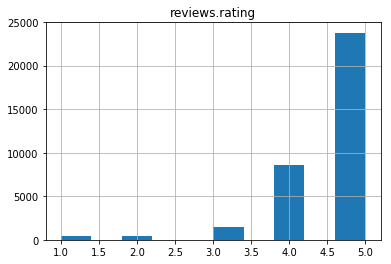

In [317]:
df.dropna(inplace=True,subset=['reviews.rating','reviews.text','reviews.title'])
df.hist(column='reviews.rating')

In [318]:
# Remove neutral values
df = df[df['reviews.rating'] != 3]
# Encode them
df['Positively Rated'] = np.where(df['reviews.rating'] > 3, 1, 0)
# Find the mean
df['Positively Rated'].mean()

0.9754845721876698

In [319]:
# Add an additional column of review title concatenated with review text
df['reviews.review'] = df['reviews.title'] + ' ' + df['reviews.text']

*We can clearly see that it is a skewed distribution with imbalanced classes*

# Training, Testing, and Validation Phase

In [320]:
from sklearn.model_selection import train_test_split
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['reviews.review'],df['Positively Rated'],random_state=0)

In [321]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Overall decent tablet Works great with everything thing I use. Battery lasts long but gets hot with games.


X_train shape:  (24841,)


# Using N-Gram Counts and Logistic Regression to Model the Data

In [322]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.remove("not")
# Creates a Sparse Matrix of Counts and fits the training data to it
vect = CountVectorizer(min_df=5,stop_words=stopwords,ngram_range=(1,3)).fit(X_train)

In [323]:
# Extract token counts and create a Document Term Matrix
X_train_vectorized = vect.transform(X_train)

In [324]:
# Training!
model = LogisticRegression(solver='lbfgs' , C=10000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [325]:
# Testing!
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
# Use ROC Area Under the Curve to evaluate your model
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7467255653033485


In [326]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:30]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['good price' 'one star' 'product grandson' 'advice' 'useless' 'lacking'
 'terrible' 'good beginners' 'works great year' 'disappointed' 'good don'
 'felt' 'great price awesome' 'price awesome' 'used best' 'camera quality'
 'south' 'not worth' 'two' 'apart' 'returned' 'kindle products'
 'great used' 'quality better' 'not expected' 'hate' 'delivered'
 'love amazon kindle' 'kindle perfect' 'stars']

Largest Coefs: 
['itunes' 'five stars' 'not bad' 'great' 'works ok' 'bought samsung'
 'tablet work' 'price good' 'good price good' 'easy']


# Using TFIDF ( Term Frequency–inverse document frequency) Instead as an alternative model

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect2 = TfidfVectorizer(min_df=5).fit(X_train)
len(vect2.get_feature_names())

3970

In [329]:
X_train_vectorized = vect2.transform(X_train)

model2 = LogisticRegression(solver='lbfgs' , C=10000)
model2.fit(X_train_vectorized, y_train)

predictions = model2.predict(vect2.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7284821923858549


In [334]:
# Function to predict review
def prediction(text):
    ans = model.predict(vect.transform([text]))
    print(ans)
    if ans == 1:
        return "Satisfied ^_^ "
    else:
        return "Unsatisfied v_v "

In [336]:
prediction('Just amazing to start with I love it')

[1]


'Satisfied ^_^ '